# Classification with Convolutional Neural Networks

**Import data & train-/val-/testsplit**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32")/255

test_images, val_images, test_labels, val_labels = train_test_split(test_images,
                                                    test_labels,
                                                    test_size=0.5,
                                                    random_state=42)

**Define CNN build**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=5, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
#Dropout auskommentieren bei Bedarf:
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#Dropout auskommentieren bei Bedarf:
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

**Compile model**

In [ ]:
model.compile(optimizer="RMSprop",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Training**

In [ ]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data = (val_images, val_labels))

Epoch 1/30
469/469 [==============================] - 156s 329ms/step - loss: 0.5474 - accuracy: 0.8009 - val_loss: 0.3832 - val_accuracy: 0.8618
Epoch 2/30
469/469 [==============================] - 151s 322ms/step - loss: 0.3505 - accuracy: 0.8725 - val_loss: 0.3189 - val_accuracy: 0.8810
Epoch 3/30
469/469 [==============================] - 151s 322ms/step - loss: 0.2983 - accuracy: 0.8906 - val_loss: 0.2818 - val_accuracy: 0.8946
Epoch 4/30
469/469 [==============================] - 151s 323ms/step - loss: 0.2720 - accuracy: 0.9004 - val_loss: 0.2809 - val_accuracy: 0.8988
Epoch 5/30
469/469 [==============================] - 150s 320ms/step - loss: 0.2553 - accuracy: 0.9061 - val_loss: 0.2526 - val_accuracy: 0.9074
Epoch 6/30
469/469 [==============================] - 151s 323ms/step - loss: 0.2380 - accuracy: 0.9120 - val_loss: 0.2541 - val_accuracy: 0.9036
Epoch 7/30
469/469 [==============================] - 151s 321ms/step - loss: 0.2283 - accuracy: 0.9155 - val_loss: 0.2375 -

**Plot loss** (Nicht in MA, zur Überwachung von Overfitting)

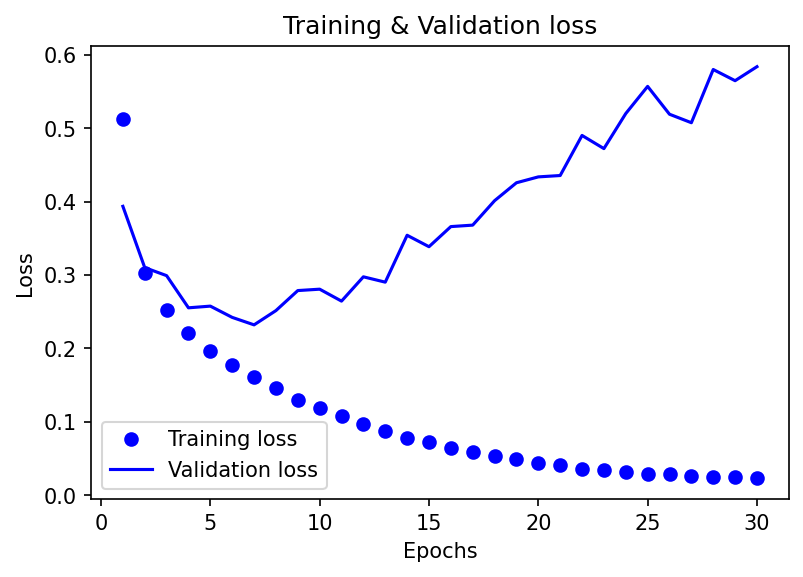

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(dpi=150)
plt.plot(epochs, loss_values,"bo", label ="Training loss")
plt.plot(epochs, val_loss_values, "b", label ="Validation loss")
plt.title("Training & Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Plot accuracy**

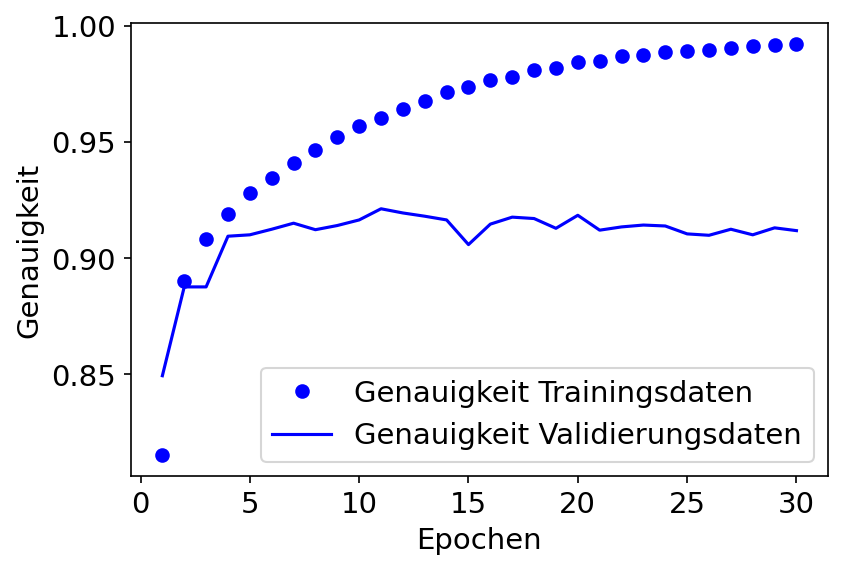

In [ ]:
import matplotlib.pyplot as plt

s=14
#plt.rcParams["figure.figsize"] = (10,6)
plt.figure(dpi=150)
plt.rc ('font', size = s) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = s) # Schriftgröße des Titels
plt.rc ('axes', labelsize = s) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = s) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = s) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = s)


history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc, "bo", label ="Accuracy training")
plt.plot(epochs, val_acc, "b", label ="Accuracy validation")
#plt.title("Richtig klassifizierte Daten")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Ergebnis für die Testdaten**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

157/157 [==============================] - 3s 21ms/step - loss: 0.5682 - accuracy: 0.9198
Test Genauigkeit: 0.9197999835014343
